<a href="https://colab.research.google.com/github/mehrnazeraeisi/Diabetes/blob/main/Diabet_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

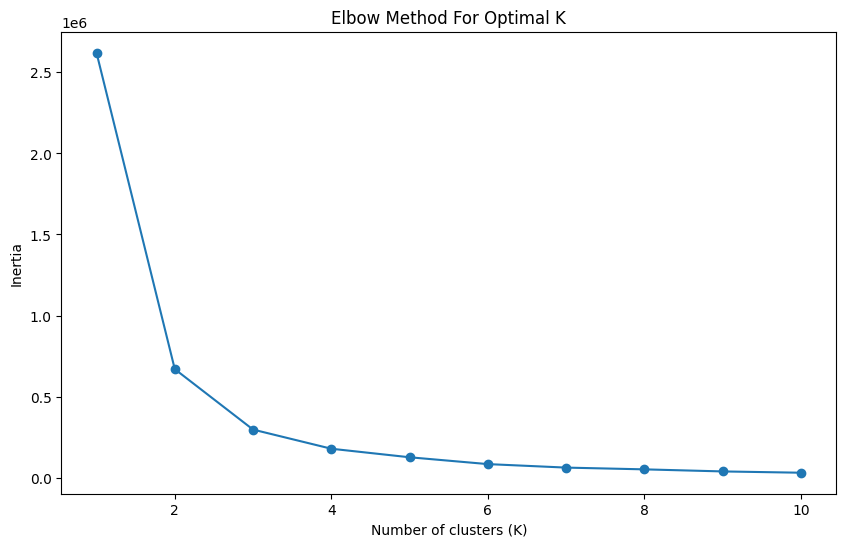

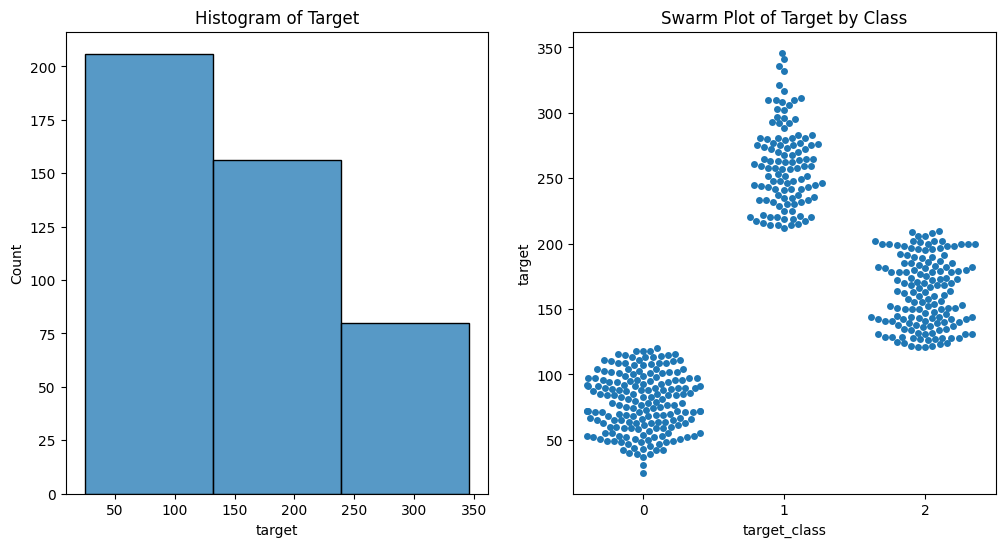

نتایج مقایسه دو روش:
      Method         MSE  R² Score
Standard KNN 3083.900333  0.417929
Improved KNN 5503.146748 -0.038692


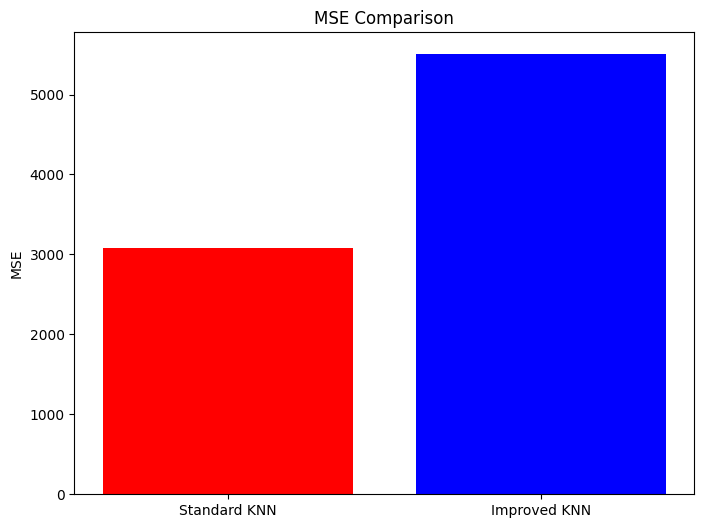

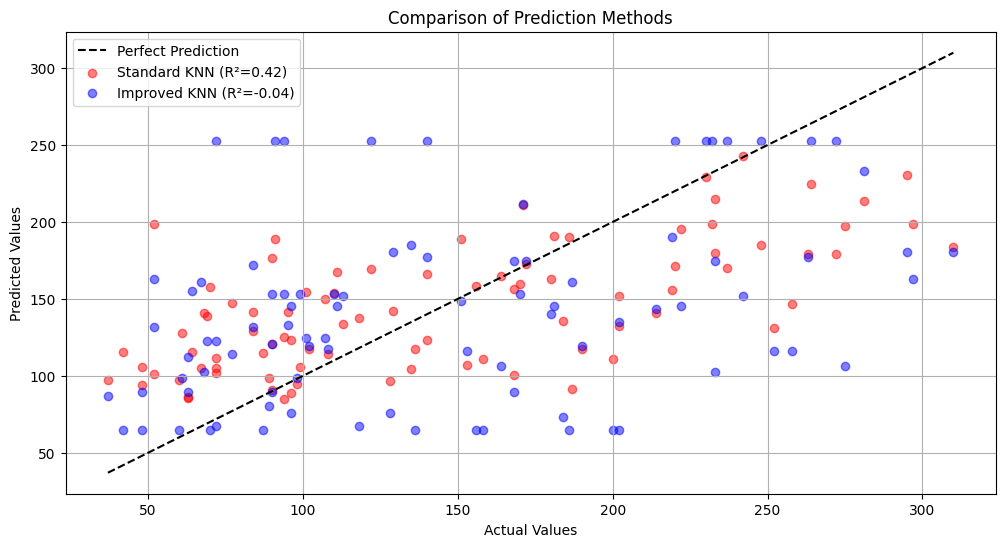

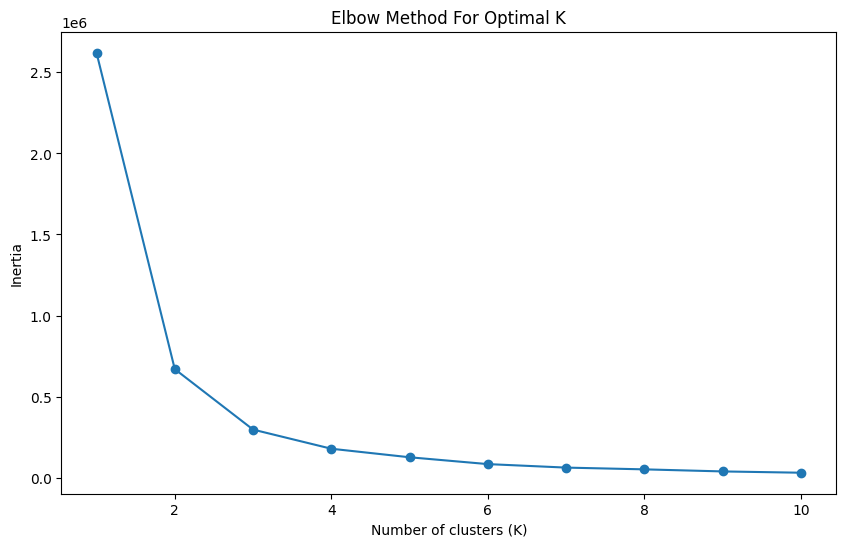

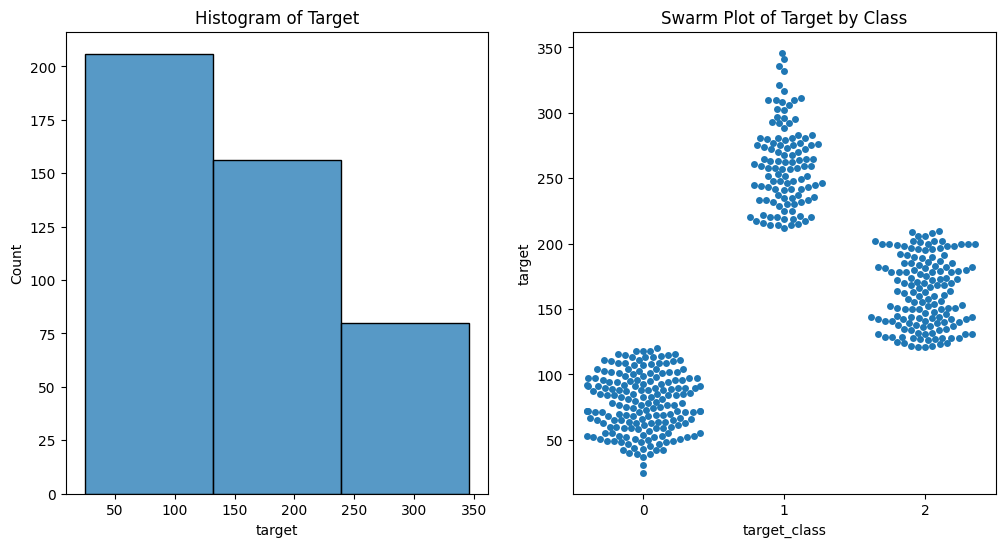

نتایج مقایسه دو روش:
      Method         MSE  R² Score
Standard KNN 3083.900333  0.417929
Improved KNN 2973.144086  0.438834


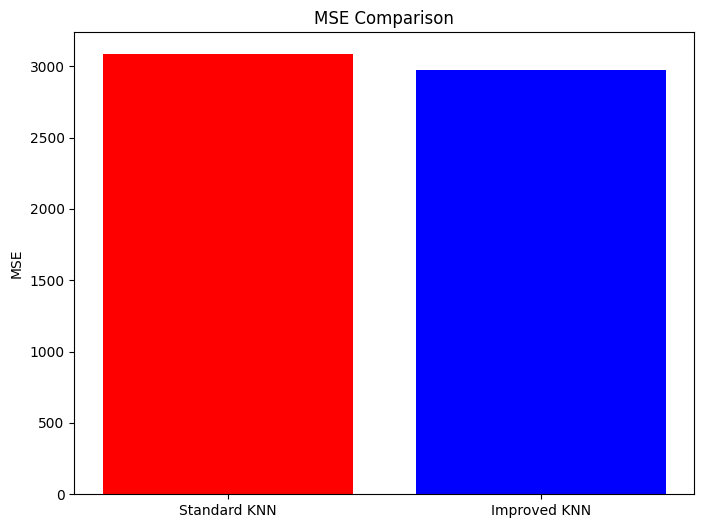

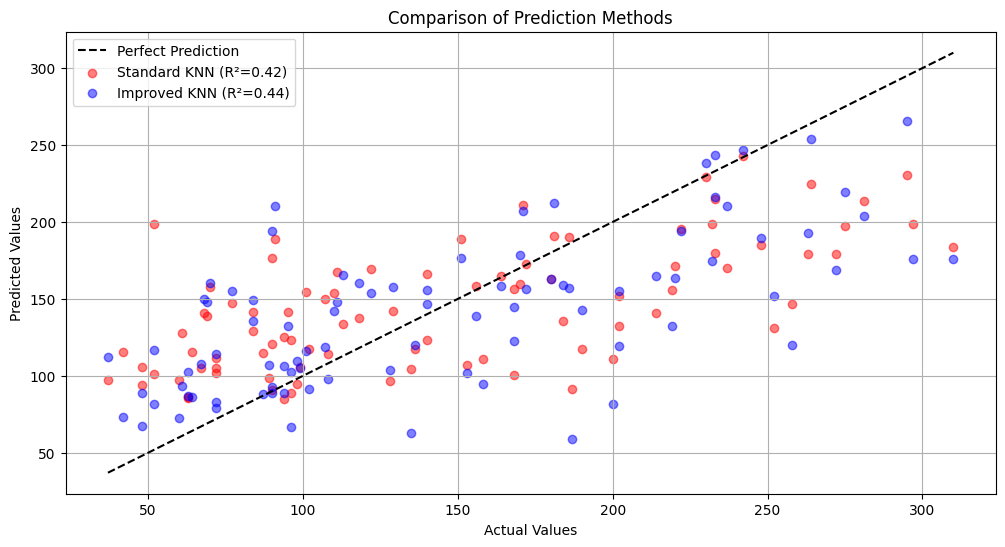

In [3]:

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
# Remove rows with missing values
df = df.dropna()

# Find optimal K using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df['target'].values.reshape(-1, 1))  # Convert target to 2D array
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Determine optimal K
K_optimal = 3
kmeans = KMeans(n_clusters=K_optimal, random_state=0)
df['target_class'] = kmeans.fit_predict(df['target'].values.reshape(-1, 1))

# Plot target distribution
plt.figure(figsize=(12, 6))

# Histogram plot
plt.subplot(1, 2, 1)
sns.histplot(df['target'], bins=3)
plt.title('Histogram of Target')

# Swarm plot
plt.subplot(1, 2, 2)
sns.swarmplot(x=df['target_class'], y=df['target'])
plt.title('Swarm Plot of Target by Class')

plt.show()

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = int(np.sqrt(len(X_train)))

# 1. روش KNN رگرسیون استاندارد
knn_standard = KNeighborsRegressor(n_neighbors=k)
knn_standard.fit(X_train, y_train)
y_pred_standard = knn_standard.predict(X_test)

# محاسبه معیارهای ارزیابی برای روش استاندارد
mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

# 2. روش بهبود یافته KNN ویژگی-محور
def feature_wise_knn(X_train, y_train, X_test, k=k):
    predictions = []
    for case in X_test:
        all_neighbors = []
        for j in range(X_train.shape[1]):
            distances = np.abs(X_train[:, j] - case[j])
            nearest_indices = distances.argsort()[:k]
            all_neighbors.extend(nearest_indices)

        unique, counts = np.unique(all_neighbors, return_counts=True)
        majority_indices = unique[counts == counts.max()]

        if len(majority_indices) > 0:
            pred = y_train[majority_indices].mean()
        else:
            pred = y_train.mean()

        predictions.append(pred)

    # مدل KNN رگرسیون نهایی برای پیش‌بینی نهایی
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(np.array(predictions).reshape(-1, 1), np.array(predictions))  # آموزش مدل روی پیش‌بینی‌ها
    final_y_pred = knn_regressor.predict(np.array(predictions).reshape(-1, 1))  # پیش‌بینی نهایی

    return final_y_pred  # بازگشت پیش‌بینی‌های نهایی

# اعمال تابع بر روی داده‌های آموزش و تست
y_pred_improved = feature_wise_knn(X_train, y_train, X_test)

# محاسبه معیارهای ارزیابی برای روش بهبود یافته
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

# نمایش نتایج عددی
results = pd.DataFrame({
    'Method': ['Standard KNN', 'Improved KNN'],
    'MSE': [mse_standard, mse_improved],
    'R² Score': [r2_standard, r2_improved]
})
print("نتایج مقایسه دو روش:")
print(results.to_string(index=False))

# رسم نمودار مقایسه‌ای برای MSE
plt.figure(figsize=(8, 6))

# مقایسه MSE
plt.bar(['Standard KNN', 'Improved KNN'], [mse_standard, mse_improved], color=['red', 'blue'])
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.show()

# رسم نمودار پراکندگی برای R² score
plt.figure(figsize=(12, 6))

# خط ایده‌آل
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', label='Perfect Prediction')

# نقاط پیش‌بینی روش استاندارد
plt.scatter(y_test, y_pred_standard, c='red', alpha=0.5,
           label=f'Standard KNN (R²={r2_standard:.2f})')

# نقاط پیش‌بینی روش بهبود یافته
plt.scatter(y_test, y_pred_improved, c='blue', alpha=0.5,
           label=f'Improved KNN (R²={r2_improved:.2f})')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Prediction Methods')
plt.legend()
plt.grid(True)
plt.show()



import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
# Remove rows with missing values
df = df.dropna()

# Find optimal K using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df['target'].values.reshape(-1, 1))  # Convert target to 2D array
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Determine optimal K
K_optimal = 3
kmeans = KMeans(n_clusters=K_optimal, random_state=0)
df['target_class'] = kmeans.fit_predict(df['target'].values.reshape(-1, 1))

# Plot target distribution
plt.figure(figsize=(12, 6))

# Histogram plot
plt.subplot(1, 2, 1)
sns.histplot(df['target'], bins=3)
plt.title('Histogram of Target')

# Swarm plot
plt.subplot(1, 2, 2)
sns.swarmplot(x=df['target_class'], y=df['target'])
plt.title('Swarm Plot of Target by Class')

plt.show()

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = int(np.sqrt(len(X_train)))

# 1. روش KNN رگرسیون استاندارد
knn_standard = KNeighborsRegressor(n_neighbors=k)
knn_standard.fit(X_train, y_train)
y_pred_standard = knn_standard.predict(X_test)

# محاسبه معیارهای ارزیابی برای روش استاندارد
mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

# Improved KNN with weights
def improved_knn_with_weights(X_train, y_train, X_test, k=5):
    predictions = []
    for case in X_test:
        # Calculate distances to all training samples
        distances = np.linalg.norm(X_train - case, axis=1)
        nearest_indices = distances.argsort()[:k]

        # Get the targets of the k nearest neighbors
        neighbors_targets = y_train[nearest_indices]
        neighbors_distances = distances[nearest_indices]

        # Weights are the inverse of the distance
        weights = 1 / (neighbors_distances + 1e-10)  # Add small value to avoid division by zero

        # Calculate weighted average of neighbors' targets
        weighted_prediction = np.sum(neighbors_targets * weights) / np.sum(weights)
        predictions.append(weighted_prediction)

    return np.array(predictions)

# اعمال تابع بر روی داده‌های آموزش و تست
y_pred_improved = improved_knn_with_weights(X_train, y_train, X_test)

# محاسبه معیارهای ارزیابی برای روش بهبود یافته
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

# نمایش نتایج عددی
results = pd.DataFrame({
    'Method': ['Standard KNN', 'Improved KNN'],
    'MSE': [mse_standard, mse_improved],
    'R² Score': [r2_standard, r2_improved]
})
print("نتایج مقایسه دو روش:")
print(results.to_string(index=False))

# رسم نمودار مقایسه‌ای برای MSE
plt.figure(figsize=(8, 6))

# مقایسه MSE
plt.bar(['Standard KNN', 'Improved KNN'], [mse_standard, mse_improved], color=['red', 'blue'])
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.show()

# رسم نمودار پراکندگی برای R² score
plt.figure(figsize=(12, 6))

# خط ایده‌آل
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', label='Perfect Prediction')

# نقاط پیش‌بینی روش استاندارد
plt.scatter(y_test, y_pred_standard, c='red', alpha=0.5,
           label=f'Standard KNN (R²={r2_standard:.2f})')

# نقاط پیش‌بینی روش بهبود یافته
plt.scatter(y_test, y_pred_improved, c='blue', alpha=0.5,
           label=f'Improved KNN (R²={r2_improved:.2f})')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Prediction Methods')
plt.legend()
plt.grid(True)
plt.show()




